# Lab 2
INFO 5871-001, Fall 2019

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data
This is data gathered from the class about their preferences over the course material. See `data_description.md` file for more information.

In [2]:
student_info = pd.read_csv('INFO5871-student-info.csv')
print(student_info.shape)
student_info

(12, 13)


Python  Data Mgmt  Visualization  Databases  Scraping  APIs  Text  Stats  \
0        3          2              2          4         4     4     4    1.0   
1        4          4              4          4         4     3     4    1.0   
2        1          4              4          1         1     1     3    4.0   
3        4          4              4          4         4     4     4    4.0   
4        1          1              3          3         1     1     3    1.0   
5        3          3              4          4         4     4     4    NaN   
6        1          1              4          1         1     4     1    4.0   
7        4          4              4          4         3     3     4    1.0   
8        4          4              4          4         4     4     4    4.0   
9        3          3              3          1         2     2     3    4.0   
10       4          4              4          4         4     4     4    4.0   
11       4          3              3          4         3     3     3    4.0   

    Testing  Modeling  Topic  SNA  Reporting  
0       1.0       4.0    3.0  2.0        4.0  
1       3.0       4.0    NaN  3.0        4.0  
2       4.0       4.0    4.0  4.0        4.0  
3       4.0       4.0    4.0  4.0        4.0  
4       3.0       3.0    3.0  3.0        1.0  
5       NaN       NaN    NaN  NaN        NaN  
6       4.0       4.0    1.0  4.0        4.0  
7       1.0       4.0    3.0  3.0        4.0  
8       4.0       4.0    4.0  4.0        4.0  
9       1.0       1.0    NaN  2.0        3.0  
10      4.0       4.0    4.0  4.0        4.0  
11      3.0       4.0    3.0  2.0        4.0

### Cleaning the data
Why are the columns different? `Python` has integer values; `Stats` has decimal values. 

In [3]:
student_info['Python'].head()

0    3
1    4
2    1
3    4
4    1
Name: Python, dtype: int64

In [4]:
student_info['Stats'].head()

0    1.0
1    1.0
2    4.0
3    4.0
4    1.0
Name: Stats, dtype: float64

Notice the difference in `dtype`: `int64` vs `float64`. 

Key point:

A `Series` can only have one data type. Missing data is the NaN type, which is a floating point value, and so the whole `Series` has to be of `float` type. 

### Clean up plan

We are going to fix up the data. We will create a new data frame using just the parts with floating point values and add that back to the original data.

To do this, we first need to decide how to handle the missing values. There are various options, but since there is so little data, we don't want to throw any away. Also, if we throw out entries, then we won't be able to merge this data frame back with the other question answers. So, our best choice is "impute" the missing data -- to provide reasonable values that let us continue with the data analysis. A typical choice would be using the column average. However, we want the values to be integers so instead we will substitute the missing entries in each column with the median value from that column.

Step are:
- replace missing values with the median
- convert the series to integer type
- create a new data frame
- join it back to the original one


### Conversion function
We will do replacement and conversion by writing a function. This will save us a lot of typing of the same commands over and over.

In [5]:
def clean_column(col_name):
    col = student_info[col_name]
    clean_col = col.fillna(col.median())
    return clean_col.astype('int32')

clean_column('Stats')

0     1
1     1
2     4
3     4
4     1
5     4
6     4
7     1
8     4
9     4
10    4
11    4
Name: Stats, dtype: int32

### Creating the new data frame
There are a number of ways to create new data frames. We will create a dictionary of the Series returned by our conversion function and create a data frame from that. The keys will become the column names. 

In [6]:
stats_qs = {'Stats' : clean_column('Stats'), 'Testing' : clean_column('Testing'), 
             'Modeling' : clean_column('Modeling'), 'Topic' : clean_column('Topic'), 'SNA' : clean_column('SNA'),
            'Reporting' : clean_column('Reporting')}
stats_qs['Stats']

0     1
1     1
2     4
3     4
4     1
5     4
6     4
7     1
8     4
9     4
10    4
11    4
Name: Stats, dtype: int32

Now we can pass this dictionary to the `DataFrame` constructor and get back an instance.

In [7]:
student_stats = pd.DataFrame(stats_qs)
student_stats

Stats  Testing  Modeling  Topic  SNA  Reporting
0       1        1         4      3    2          4
1       1        3         4      3    3          4
2       4        4         4      4    4          4
3       4        4         4      4    4          4
4       1        3         3      3    3          1
5       4        3         4      3    3          4
6       4        4         4      1    4          4
7       1        1         4      3    3          4
8       4        4         4      4    4          4
9       4        1         1      3    2          3
10      4        4         4      4    4          4
11      4        3         4      3    2          4

### New data frame
The first step is to create a data frame with just the python columns. Then we merge it with the one created above.

The `concat` function doesn't know whether we want to put these data frames on top of each other or side-by-side, so we have to specify. `axis=0` is row-wise and `axis=1` is column-wise.

In [19]:
student_python = student_info[['Python', 'Data Mgmt', 'Visualization', 'Databases', 'Scraping', 'APIs']]
student_new = pd.concat([student_python, student_stats], axis=1)
print(student_new.shape)
student_new
                           

(12, 12)


Python  Data Mgmt  Visualization  Databases  Scraping  APIs  Stats  \
0        3          2              2          4         4     4      1   
1        4          4              4          4         4     3      1   
2        1          4              4          1         1     1      4   
3        4          4              4          4         4     4      4   
4        1          1              3          3         1     1      1   
5        3          3              4          4         4     4      4   
6        1          1              4          1         1     4      4   
7        4          4              4          4         3     3      1   
8        4          4              4          4         4     4      4   
9        3          3              3          1         2     2      4   
10       4          4              4          4         4     4      4   
11       4          3              3          4         3     3      4   

    Testing  Modeling  Topic  SNA  Reporting  
0         1         4      3    2          4  
1         3         4      3    3          4  
2         4         4      4    4          4  
3         4         4      4    4          4  
4         3         3      3    3          1  
5         3         4      3    3          4  
6         4         4      1    4          4  
7         1         4      3    3          4  
8         4         4      4    4          4  
9         1         1      3    2          3  
10        4         4      4    4          4  
11        3         4      3    2          4

### Question: Is there a relationship between wanting more Python and wanting more stats material?

Let's start by looking at the several of the columns. 

In [18]:
pd.value_counts(student_new['Python'])

4    6
3    3
1    3
Name: Python, dtype: int64

In [21]:
pd.value_counts(student_new['Python']) / 12

4    0.50
3    0.25
1    0.25
Name: Python, dtype: float64

In [16]:
data_mod_tbl = pd.crosstab(student_new['Data Mgmt'], student_new['Modeling'])
data_mod_tbl

Modeling   1  3  4
Data Mgmt         
1          0  1  1
2          0  0  1
3          1  0  2
4          0  0  6

In [22]:
pd.crosstab(student_new['Data Mgmt'], student_new['Modeling'], normalize=True)

Modeling          1         3         4
Data Mgmt                              
1          0.000000  0.083333  0.083333
2          0.000000  0.000000  0.083333
3          0.083333  0.000000  0.166667
4          0.000000  0.000000  0.500000

Given modeling, what's the probability of data management? P(Mgmt=4 | Modeling=4)

Two ways to compute
- Count in cell divided by total for condition
- P(Mgmt, Modeling) / P(Modeling)

In [30]:
data_mod_tbl[4].loc[4] / data_mod_tbl[4].sum()

0.6

In [26]:
pd.crosstab(student_new['Data Mgmt'], student_new['Modeling'], normalize=True).loc[4,4] / \
    (pd.value_counts(student_new['Modeling']).loc[4] / 12)

0.6

### Histograms

Individually, via histograms. A histogram shows an empirical distribution of values: how frequently different values appear in the data.

The `hist()` function takes a list of values, not a `Series`, so we have to convert.

In [9]:
python_data = list(student_new['Python'])
python_data

[3, 4, 1, 4, 1, 3, 1, 4, 4, 3, 4, 4]

Note: A list doesn't have `Name` or a data type. It can contain any values in any combination. Even a list of lists. Of lists.

Now we are ready to call `hist`.

(array([3., 0., 0., 0., 0., 0., 3., 0., 0., 6.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

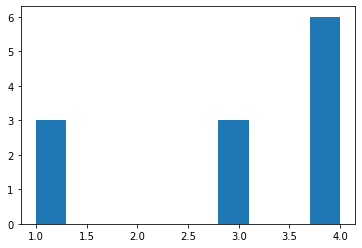

In [10]:
plt.hist(python_data)

Do the same for 'Stats'

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 8.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

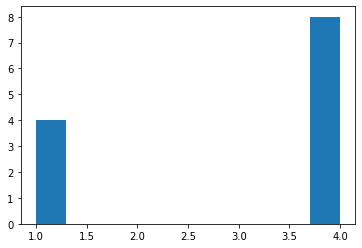

In [11]:
plt.hist(list(student_new['Stats']))

### Boxplots

A nice tool for comparing distributions is the boxplot

For this we need a list of lists. Let's compare Python, Data Management, Stats and Testing.

It is cumbersome to write everything over and over. Let's write a function

In [12]:
def extract_list(col):
    col_series = student_new[col]
    return list(col_series)

In [13]:
extract_list('Stats')

[1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4]

Now we'll use it to create our list of lists in a list comprehension

In [14]:
col_names = ['Python', 'Data Mgmt', 'Databases', 'Scraping', 'APIs', 'Stats', 'Testing', 
            'Modeling', 'Topic', 'SNA', 'Reporting']

plottable = [extract_list(col_name) for col_name in col_names]

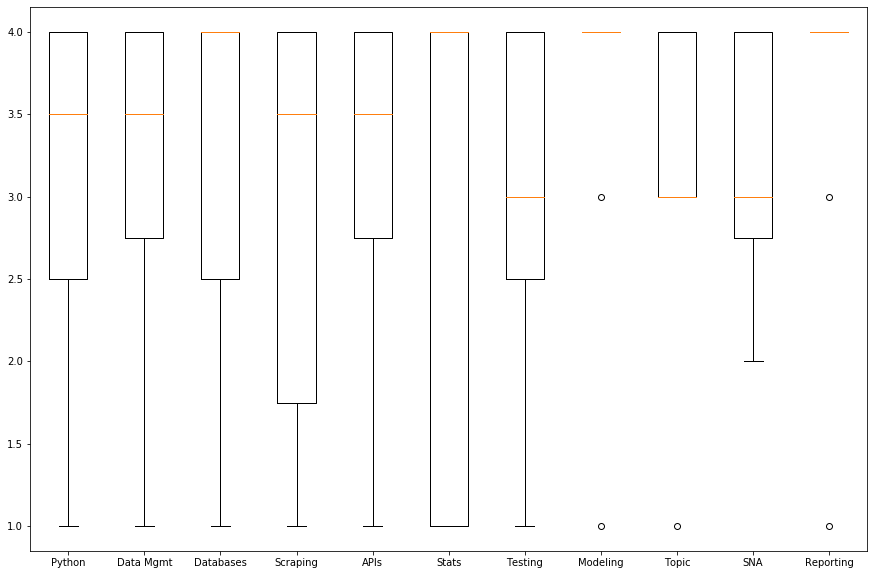

In [15]:
plt.figure(figsize=[15,10])
plt.boxplot(plottable, labels=col_names)
plt.show()

Box plots are based on the concept of a quartile. There are three quartile values in a data set. The second quartile (Q2) is the median -- the value such that half of the data is above and half is below,. The first quartile (Q1) is the value that separates the lowest half of the data evenly. Similarly the third quartile (Q3) divides the upper half of the data. The interquartile range (IQR) is Q3-Q1 and represents the range that contains 50% of the data points. A standard test for outliers is to look for data outside of the range Q1 - 1.5(IQR) and Q3 + 1.5(IQR). 

The box extends from the lower (Q1) to upper quartile (Q3) values of the data, with an orange line at the median. The whiskers extend from the box to show the 1.5 inter-quartile range of the data.

Pandas actually has its own boxplot, but where's the fun in that?

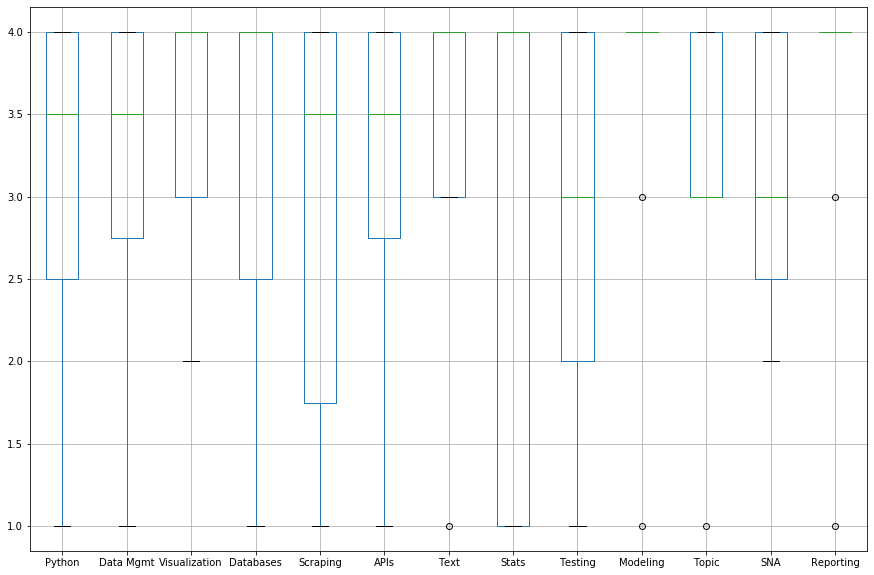

In [16]:
plt.figure(figsize=[15,10])
student_info.boxplot()

### Scatterplots

Distributions are useful to know but they don't tell us how the variables are related.

One great exploratory tool for the looking at the relationship between variables is the scatterplot. 

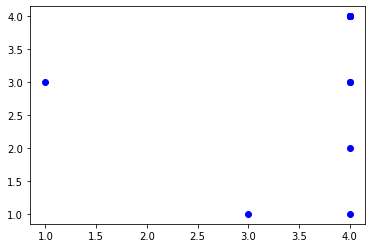

In [13]:
plt.plot(extract_list('Modeling'), extract_list('Data Mgmt'), 'ob')

### With jitter

There's a problem. The dots are overwriting each other at certain points. We know this because there are only 6 displayed and we know there are 12 observations. This is often a problem with integer-valued data.

Now, we are going to make this first plot prettier and more informative with jitter

Text(0, 0.5, 'Data Mgmt')

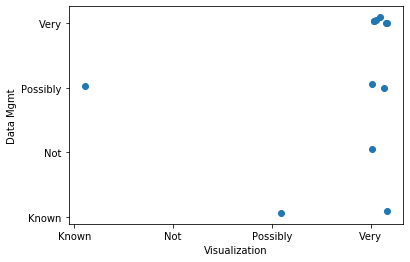

In [14]:
# Need the random library for random number generatioin
import numpy.random as rnd

# Good practice to set the seed to make your code repeatable
rnd.seed(20190904)

# Use subplots to get the axis object (ax) that lets us access all the attributes of a plot
fig, ax = plt.subplots()

# Get the list of values and add a little random noise to each one. 
# First on the x dimension
xvals = extract_list('Modeling')
xvals_jit = [xval + rnd.rand()/5.0 for xval in xvals]

# Then on the y dimension
yvals = extract_list('Data Mgmt')
yvals_jit = [yval + rnd.rand()/10.0 for yval in yvals]

# Now plot the values
ax.scatter(xvals_jit, yvals_jit)

# There are only 4 possible values, we know
ax.set_xticks([1,2,3,4])
ax.set_yticks([1,2,3,4])

# Label them as in the survey
ax.set_xticklabels(['Known', 'Not', 'Possibly', 'Very'])
ax.set_yticklabels(['Known', 'Not', 'Possibly', 'Very'])

# Label the axes so we know which is which
ax.set_xlabel('Visualization')
ax.set_ylabel('Data Mgmt')